In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.patches as mpatches
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [13]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1",low_memory = False)

In [14]:
df_new = df.groupby('iyear').success.value_counts().unstack()
success_array = []
for i in df_new.values:
    success_array.append(i[0])
#success_array

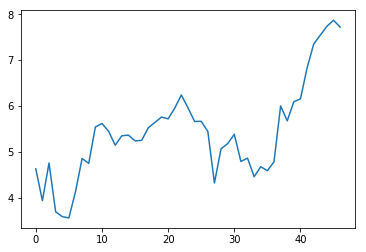

In [15]:
plt.plot(np.log(success_array))

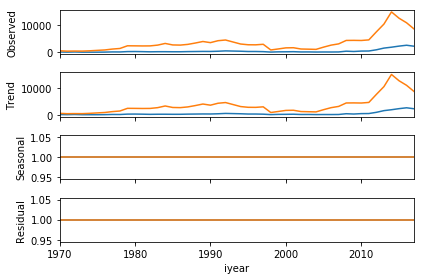

In [16]:
result = seasonal_decompose(df_new, model='multiplicative', freq=1)
result.plot()
pyplot.show()

In [17]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = success_array
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] > 0.05):
    print('the series is not stationary')
else:
    print('the series is stationary')

ADF Statistic: -2.708839
p-value: 0.072521
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
the series is not stationary


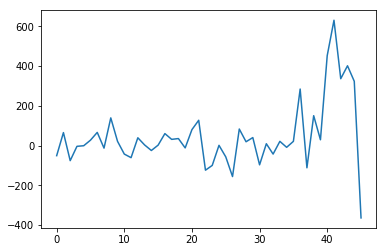

In [18]:
success_log = np.log(success_array)
differenced = [success_array[x] - success_array[x-1] for x in range(1,len(success_array))]
plt.plot(differenced)
#plt.plot(moving_avg, color = 'red')

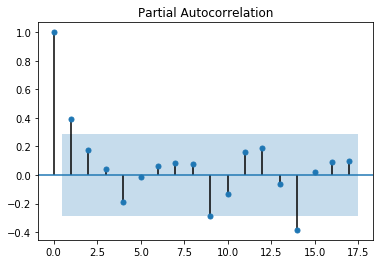

In [19]:
differenced = np.array(differenced)
plot_pacf(differenced)
plt.show()

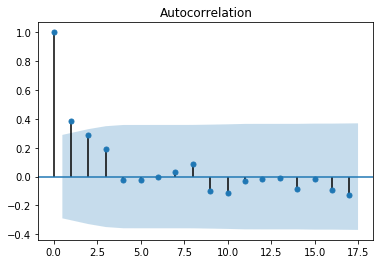

In [20]:
plot_acf(differenced)
plt.show()

In [21]:
X = differenced
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] < 0.05):
    print("the time series is stationary")
else:
    print("the time series is not stationary")

ADF Statistic: -3.744975
p-value: 0.003523
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
the time series is stationary


In [22]:
#date_array = [i for i in range(len(date_arr))]
train_success = [i for i in success_array[:25]]
test_success = [i for i in success_array[25:]]
d = {'success': train_success}
df_new = pd.DataFrame(data=d)
#df_new['year'] = df_new['year'].astype('datetime64[ns]')
np.array(df_new['success'])
df_new_array = np.array(df_new['success']) 

In [23]:
#decomposition = seasonal_decompose(np.array(success_array)) 
#model = ARIMA(np.array(df_new['success']), order=(1,1,1))
#results = model.fit(disp=-1)
#plt.plot(differenced)
#plt.plot(results.fittedvalues, color='red')
predictions = list()
for t in range(len(test_success)):
    model = ARIMA(df_new_array, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_success[t]
    df_new_array = np.append(df_new_array,obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
#error = mean_squared_error(test_success, predictions)
resid = [test_success[i] - predictions[i] for i in range(len(test_success))]
sse = np.mean([i**2 for i in resid])
sse = np.sqrt(sse)
print('Test MSE: %.3f' % sse)
# plot

predicted=324.073566, expected=288.000000
predicted=354.156824, expected=231.000000
predicted=224.607926, expected=75.000000
predicted=65.445344, expected=158.000000
predicted=191.383894, expected=177.000000
predicted=152.577190, expected=217.000000
predicted=223.117843, expected=120.000000
predicted=117.582506, expected=129.000000
predicted=144.381990, expected=86.000000
predicted=85.817613, expected=107.000000
predicted=110.806402, expected=98.000000
predicted=96.171258, expected=119.000000
predicted=119.395711, expected=403.000000
predicted=406.459780, expected=291.000000
predicted=294.621296, expected=441.000000
predicted=408.840228, expected=470.000000
predicted=484.105052, expected=922.000000
predicted=871.347113, expected=1552.000000
predicted=2001.362401, expected=1888.000000
predicted=2219.302906, expected=2289.000000
predicted=2626.076452, expected=2612.000000
predicted=2915.942296, expected=2248.000000
Test MSE: 243.563


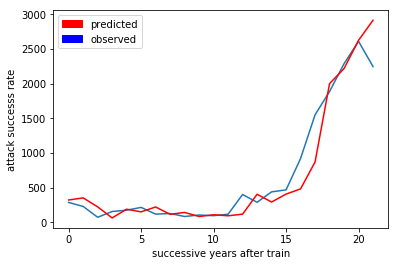

In [26]:
blue_patch = mpatches.Patch(color='blue', label='observed')
red_patch = mpatches.Patch(color='red', label='predicted')
plt.legend(handles=[red_patch,blue_patch])
pyplot.plot(test_success)
pyplot.plot(predictions, color='red')
plt.xlabel('successive years after trained years')
plt.ylabel('attack successs rate')
pyplot.show()